# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas


In [2]:
client_df = pd.read_csv('client_data_bcgx.csv')
price_df = pd.read_csv('price_data_bcgx.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types


In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
print(f'client_df rows: {len(client_df)}')
print(f'price_df rows: {len(price_df)}')

client_df rows: 14606
price_df rows: 193002


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization


In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

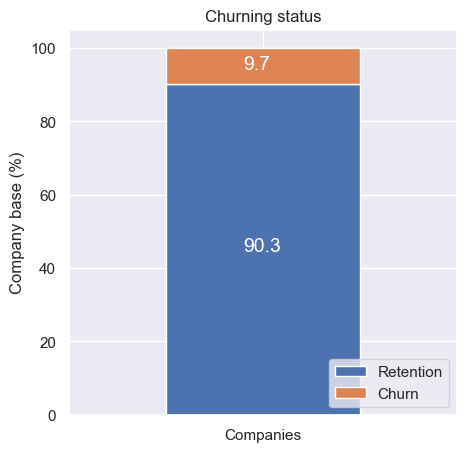

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

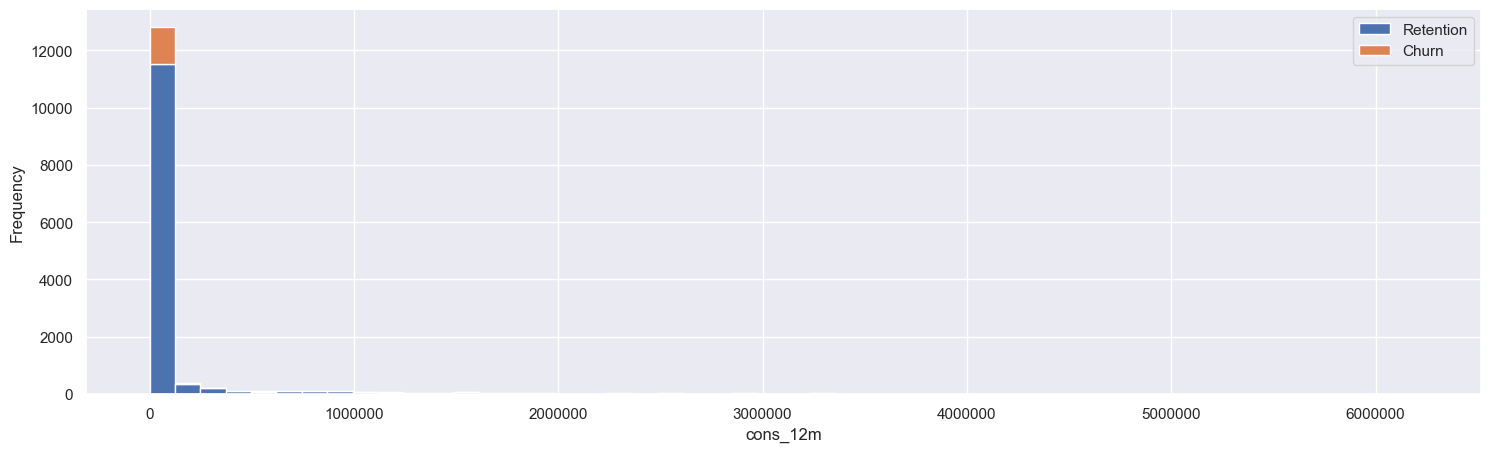

In [12]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

### Data Transformation

In [13]:
# Convert date columns to datetime
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
client_df[date_columns] = client_df[date_columns].apply(pd.to_datetime, format='%Y-%m-%d')

# Verify the data types
client_df[date_columns].dtypes

date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object

In [14]:
price_df["price_date"] = price_df["price_date"].apply(pd.to_datetime, format='%Y-%m-%d')

# Verify the conversion
print(price_df['price_date'].head())
print(price_df['price_date'].dtype)

0   2015-01-01
1   2015-02-01
2   2015-03-01
3   2015-04-01
4   2015-05-01
Name: price_date, dtype: datetime64[ns]
datetime64[ns]


In [15]:
# Check object columns in client_df
object_cols_client = client_df.select_dtypes(include=['object']).columns
print("Object columns in client_df:")
for col in object_cols_client:
    unique_types = client_df[col].apply(type).unique()
    print(f"{col}: {len(unique_types)} unique types - {unique_types}")
    # Display sample values
    print(f"Sample values: {client_df[col].head(3).tolist()}\n")

# Check object columns in price_df
object_cols_price = price_df.select_dtypes(include=['object']).columns
print("\nObject columns in price_df:")
for col in object_cols_price:
    unique_types = price_df[col].apply(type).unique()
    print(f"{col}: {len(unique_types)} unique types - {unique_types}")
    # Display sample values
    print(f"Sample values: {price_df[col].head(3).tolist()}\n")

Object columns in client_df:
id: 1 unique types - [<class 'str'>]
Sample values: ['24011ae4ebbe3035111d65fa7c15bc57', 'd29c2c54acc38ff3c0614d0a653813dd', '764c75f661154dac3a6c254cd082ea7d']

channel_sales: 1 unique types - [<class 'str'>]
Sample values: ['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING', 'foosdfpfkusacimwkcsosbicdxkicaua']

has_gas: 1 unique types - [<class 'str'>]
Sample values: ['t', 'f', 'f']

origin_up: 1 unique types - [<class 'str'>]
Sample values: ['lxidpiddsbxsbosboudacockeimpuepw', 'kamkkxfxxuwbdslkwifmmcsiusiuosws', 'kamkkxfxxuwbdslkwifmmcsiusiuosws']


Object columns in price_df:
id: 1 unique types - [<class 'str'>]
Sample values: ['038af19179925da21a25619c5a24b745', '038af19179925da21a25619c5a24b745', '038af19179925da21a25619c5a24b745']



In [16]:
# has_gas is t for true and f for false lets convert to 0 and 1 
client_df['has_gas'] = client_df['has_gas'].map({'t': 1, 'f': 0}).astype(int)

# Verify the conversion
print(client_df['has_gas'].value_counts())
print(client_df['has_gas'].dtype)

has_gas
0    11955
1     2651
Name: count, dtype: int64
int32


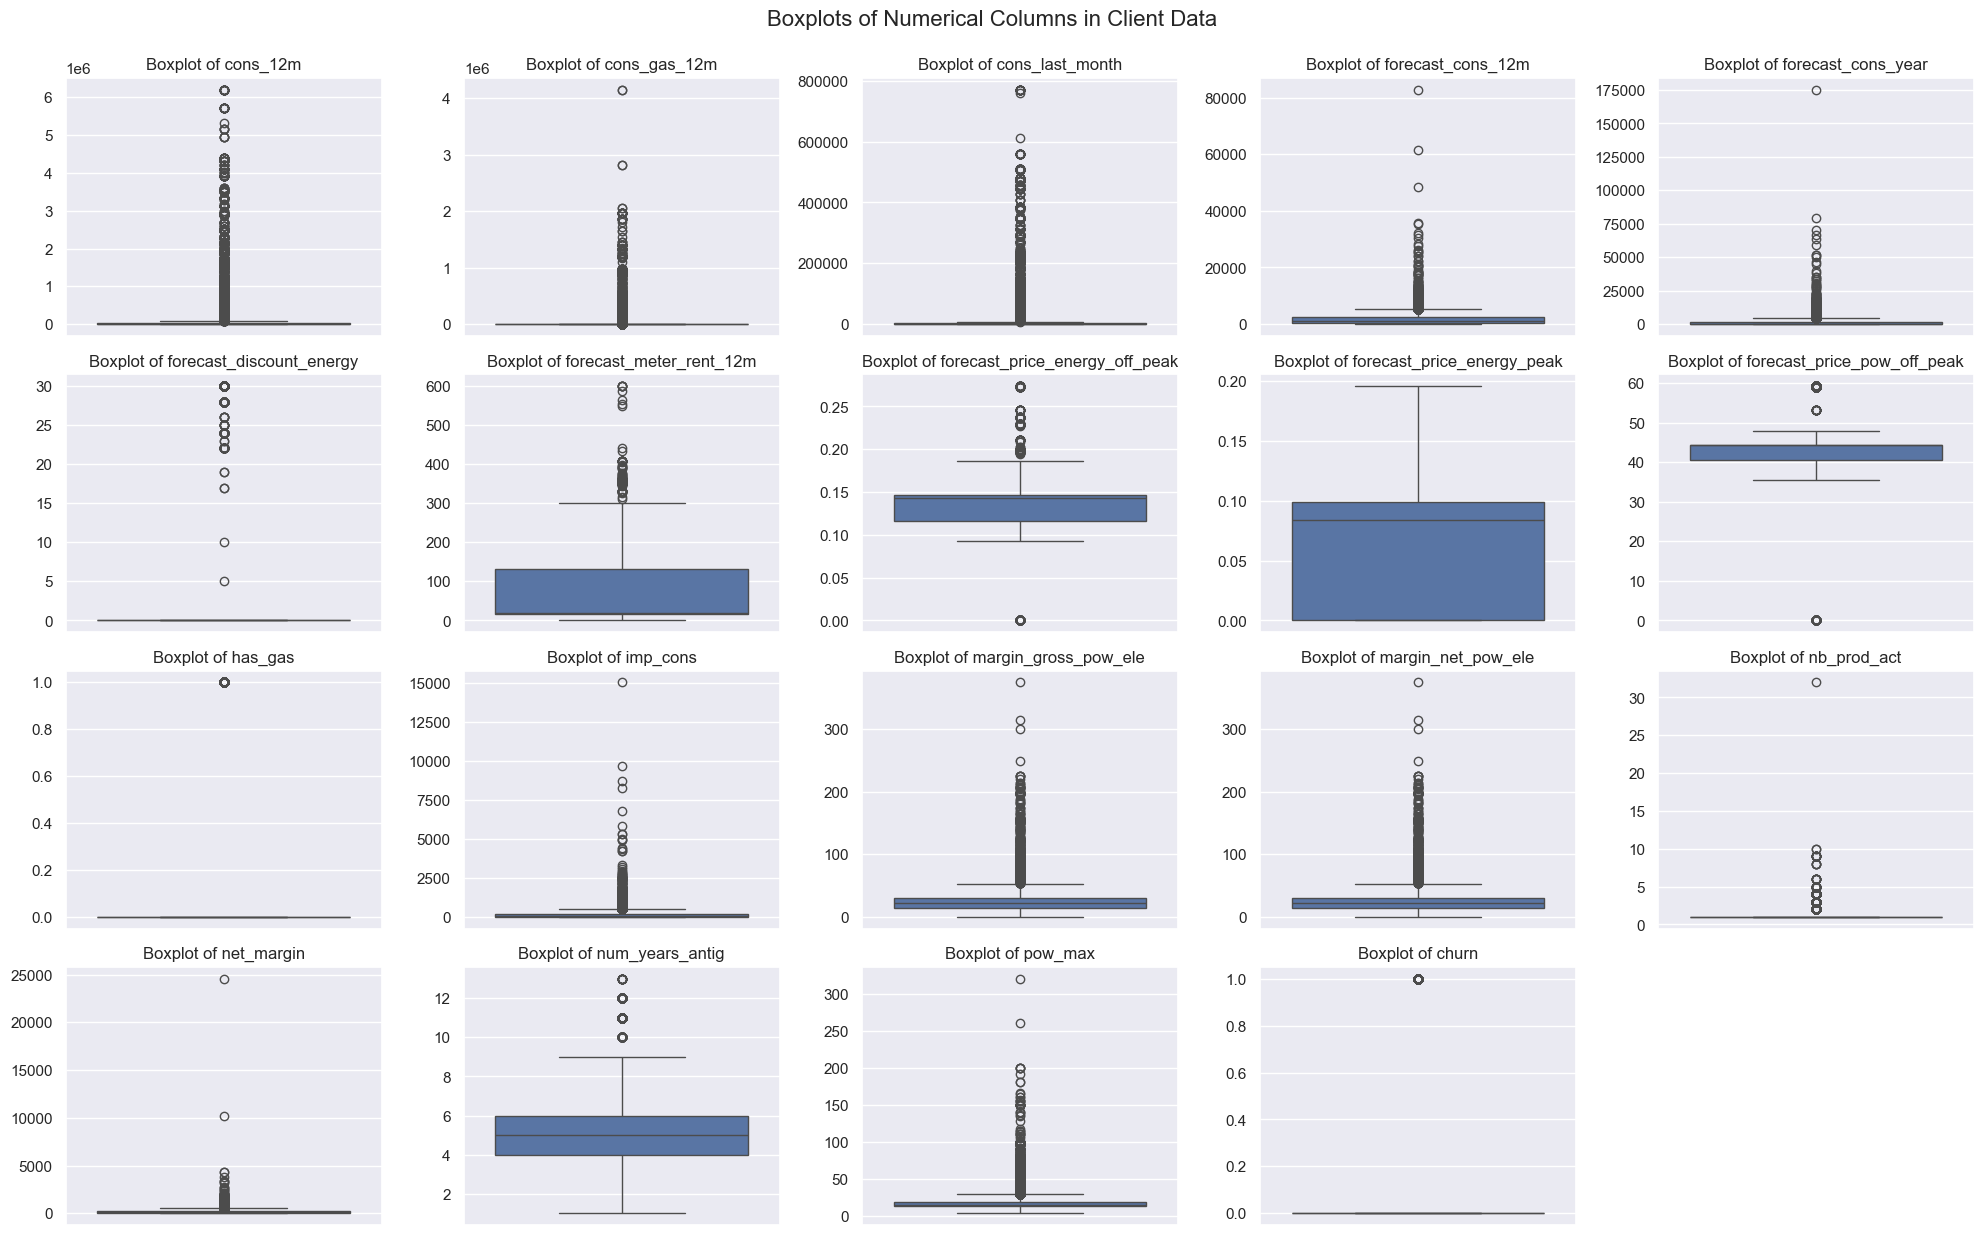

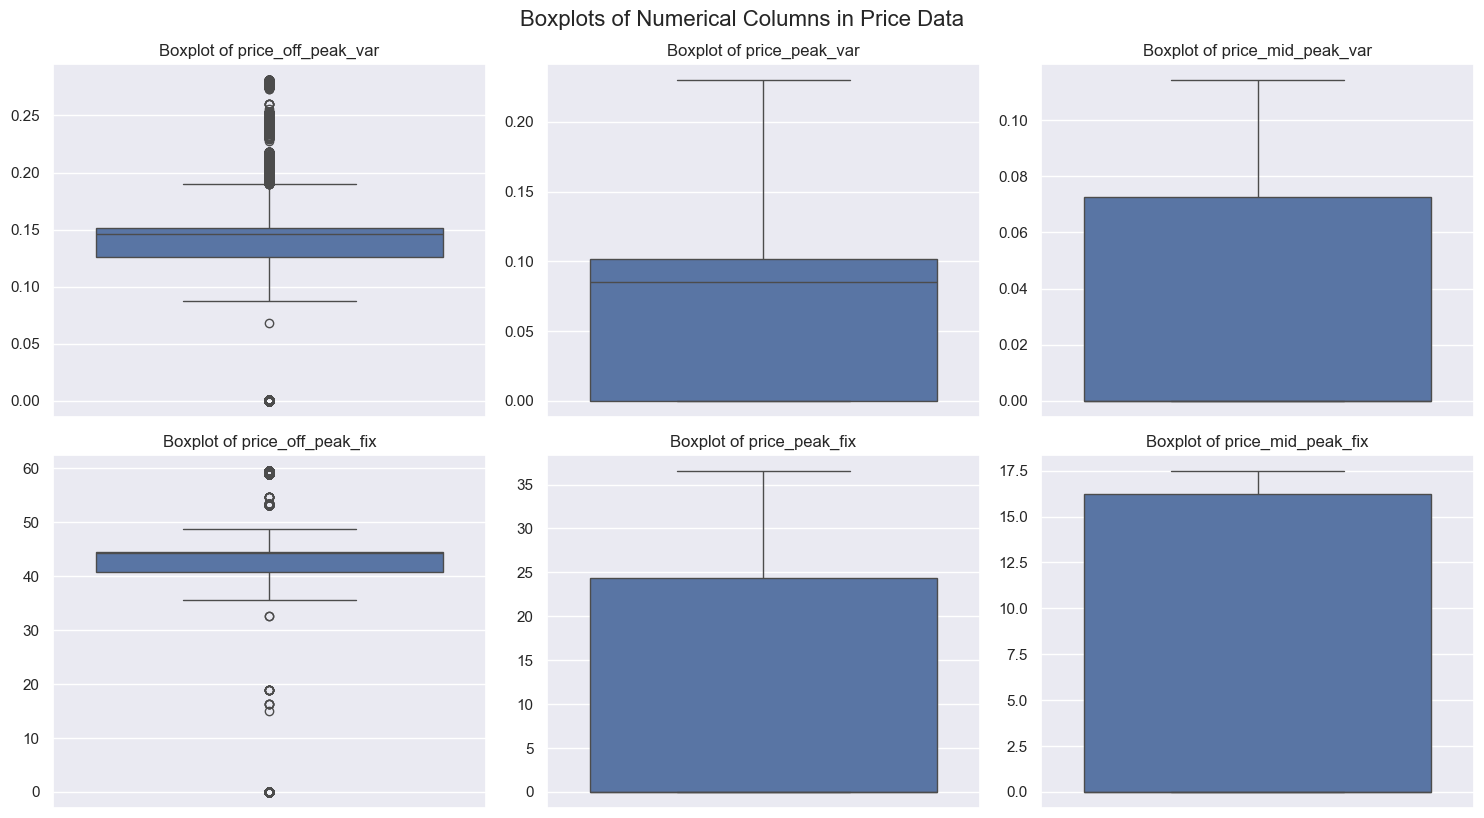

In [17]:
# Get numerical columns for client_df
client_num_cols = client_df.select_dtypes(include=['int', 'float']).columns

# Create subplots for client_df numerical columns
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(client_num_cols):
    if i < len(axes):
        sns.boxplot(y=client_df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel('')

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns in Client Data', y=1.02, fontsize=16)
plt.show()

# Get numerical columns for price_df (excluding id and date columns)
price_num_cols = price_df.select_dtypes(include=['float']).columns

# Create subplots for price_df numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(price_num_cols):
    if i < len(axes):
        sns.boxplot(y=price_df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns in Price Data', y=1.02, fontsize=16)
plt.show()

In [18]:
def collect_column_info(df: pd.DataFrame):

    info = {}

    for col in df.columns:

        series = df[col]

        info[col] = {

            'dtype': series.dtype,

            'n_missing': series.isna().sum(),

            'n_unique': series.nunique(dropna=True),

            'sample_values': series.dropna().unique()[:5].tolist()

        }

    return info

eda_dict = collect_column_info(client_df)

eda_df = pd.DataFrame.from_dict(eda_dict, orient='index')

eda_df

,dtype,n_missing,n_unique,sample_values
id,object,0,14606,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc..."
channel_sales,object,0,8,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm..."
cons_12m,int64,0,11065,"[0, 4660, 544, 1584, 4425]"
cons_gas_12m,int64,0,2112,"[54946, 0, 1542867, 80583, 41883]"
cons_last_month,int64,0,4751,"[0, 526, 1998, 1260, 2188]"
date_activ,datetime64[ns],0,1796,"[2013-06-15 00:00:00, 2009-08-21 00:00:00, 201..."
date_end,datetime64[ns],0,368,"[2016-06-15 00:00:00, 2016-08-30 00:00:00, 201..."
date_modif_prod,datetime64[ns],0,2129,"[2015-11-01 00:00:00, 2009-08-21 00:00:00, 201..."
date_renewal,datetime64[ns],0,386,"[2015-06-23 00:00:00, 2015-08-31 00:00:00, 201..."
forecast_cons_12m,float64,0,13993,"[0.0, 189.95, 47.96, 240.04, 445.75]"


### Sales Channel

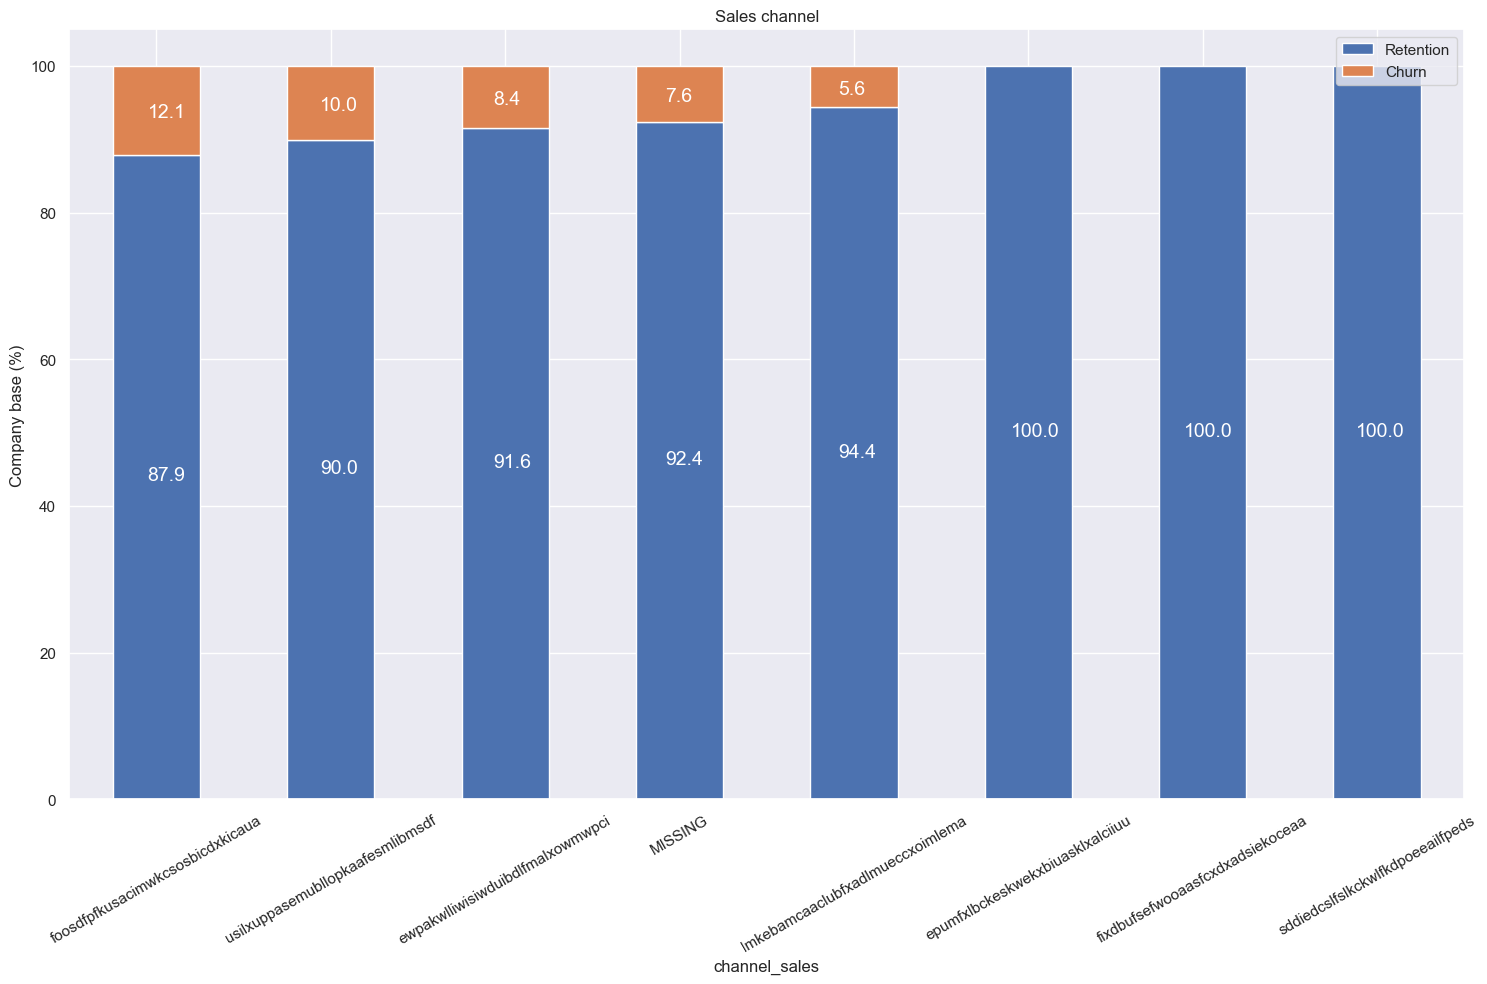

In [19]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

### Consumption

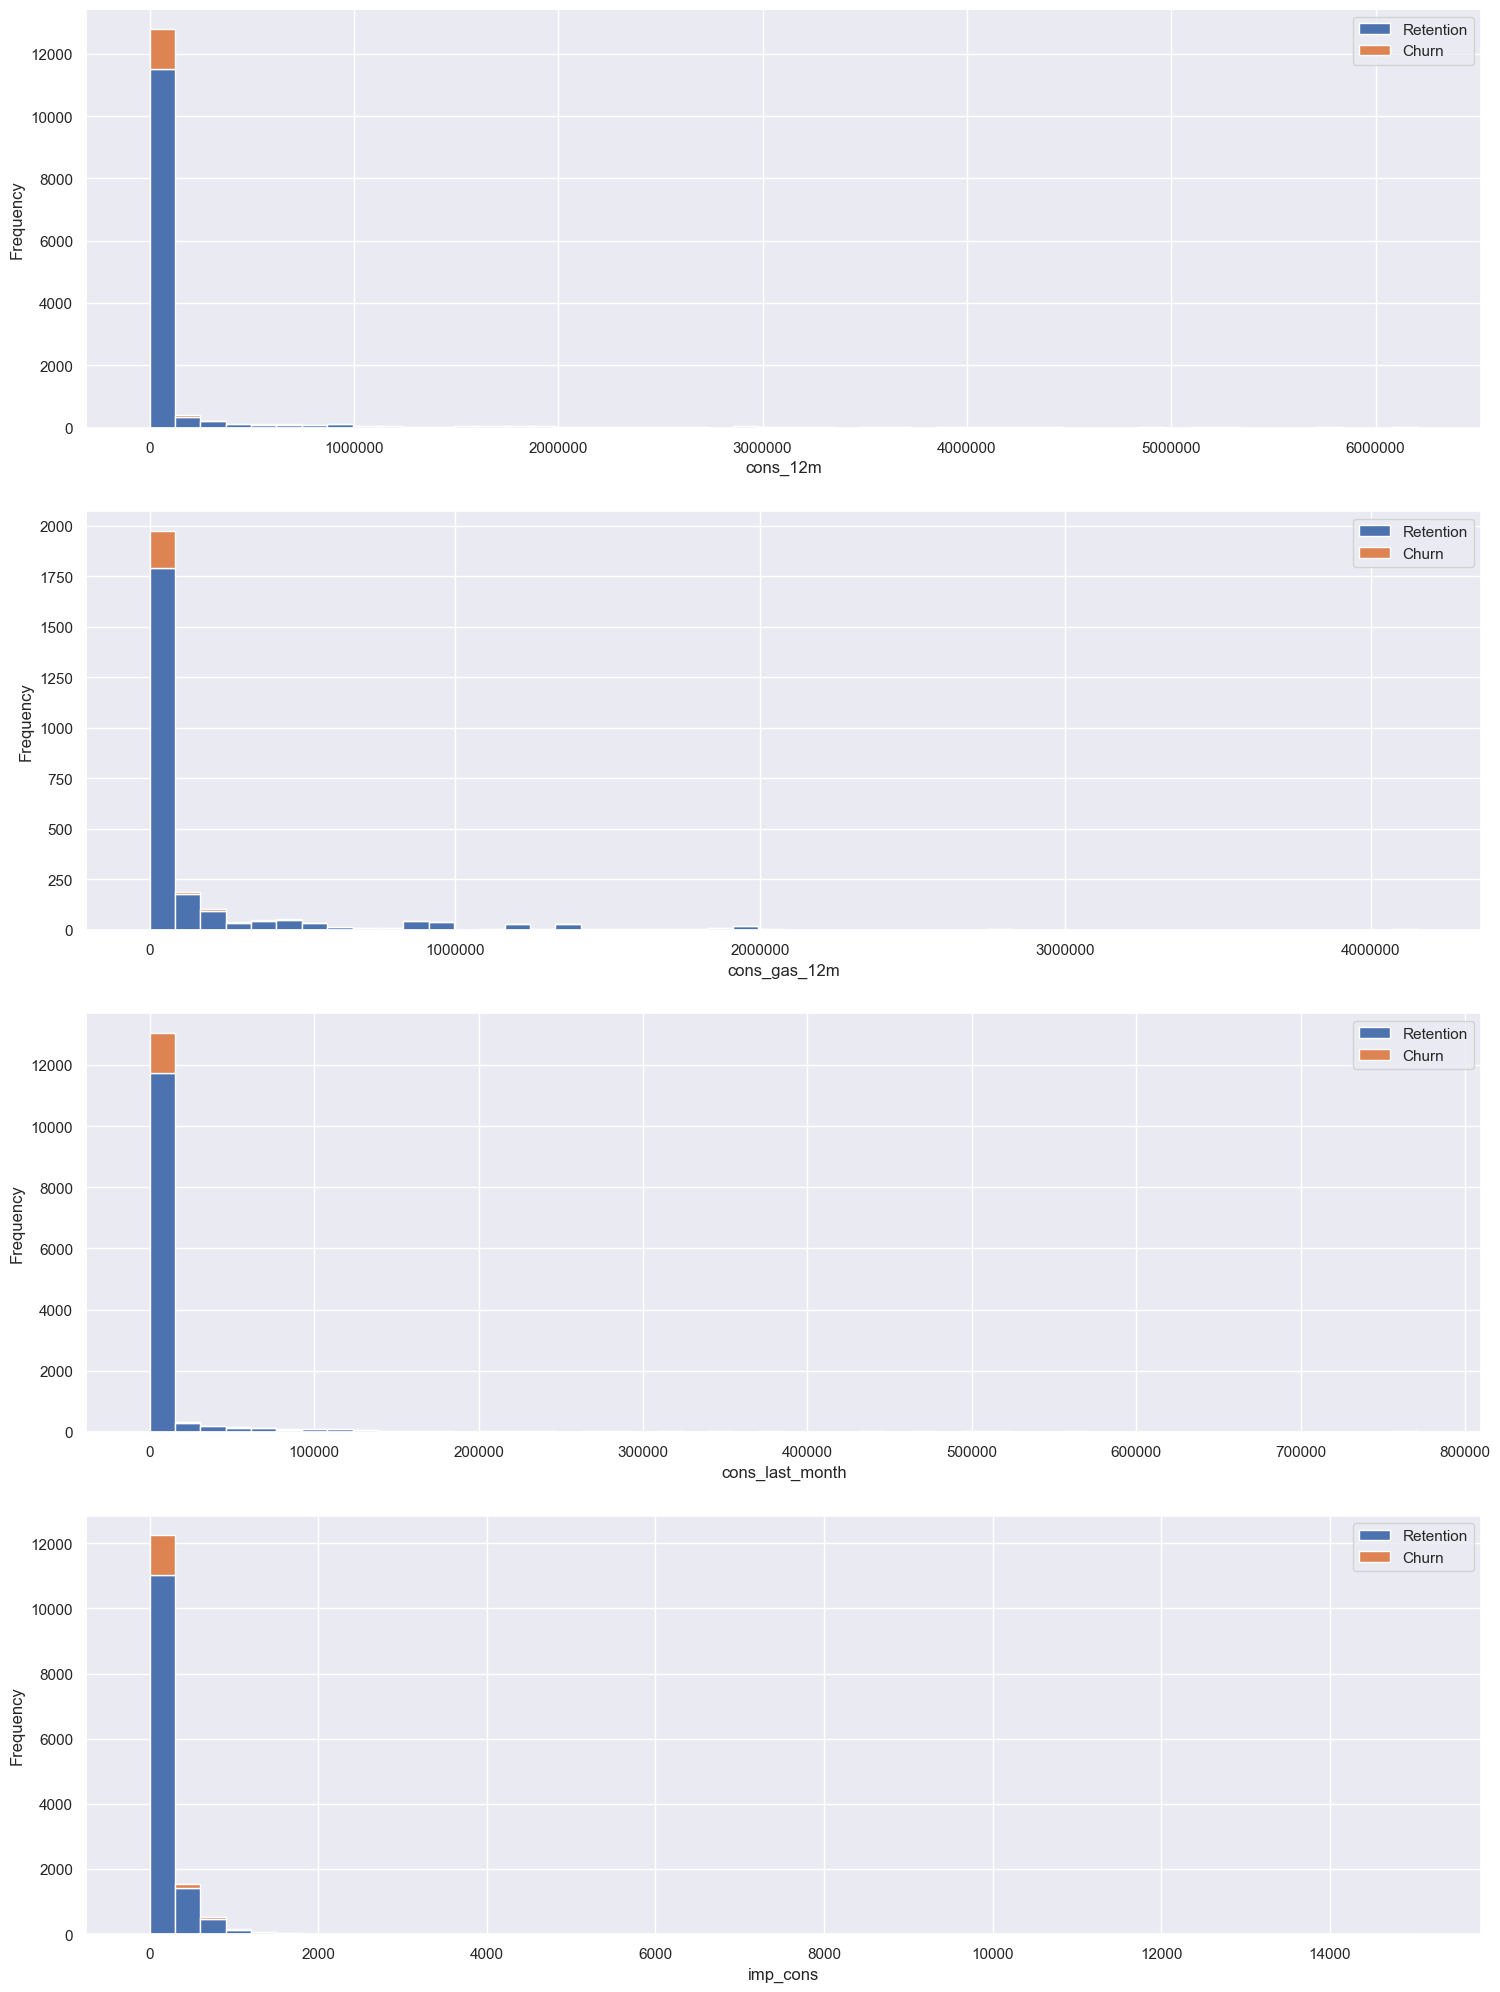

In [20]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

### Forecast

In [21]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

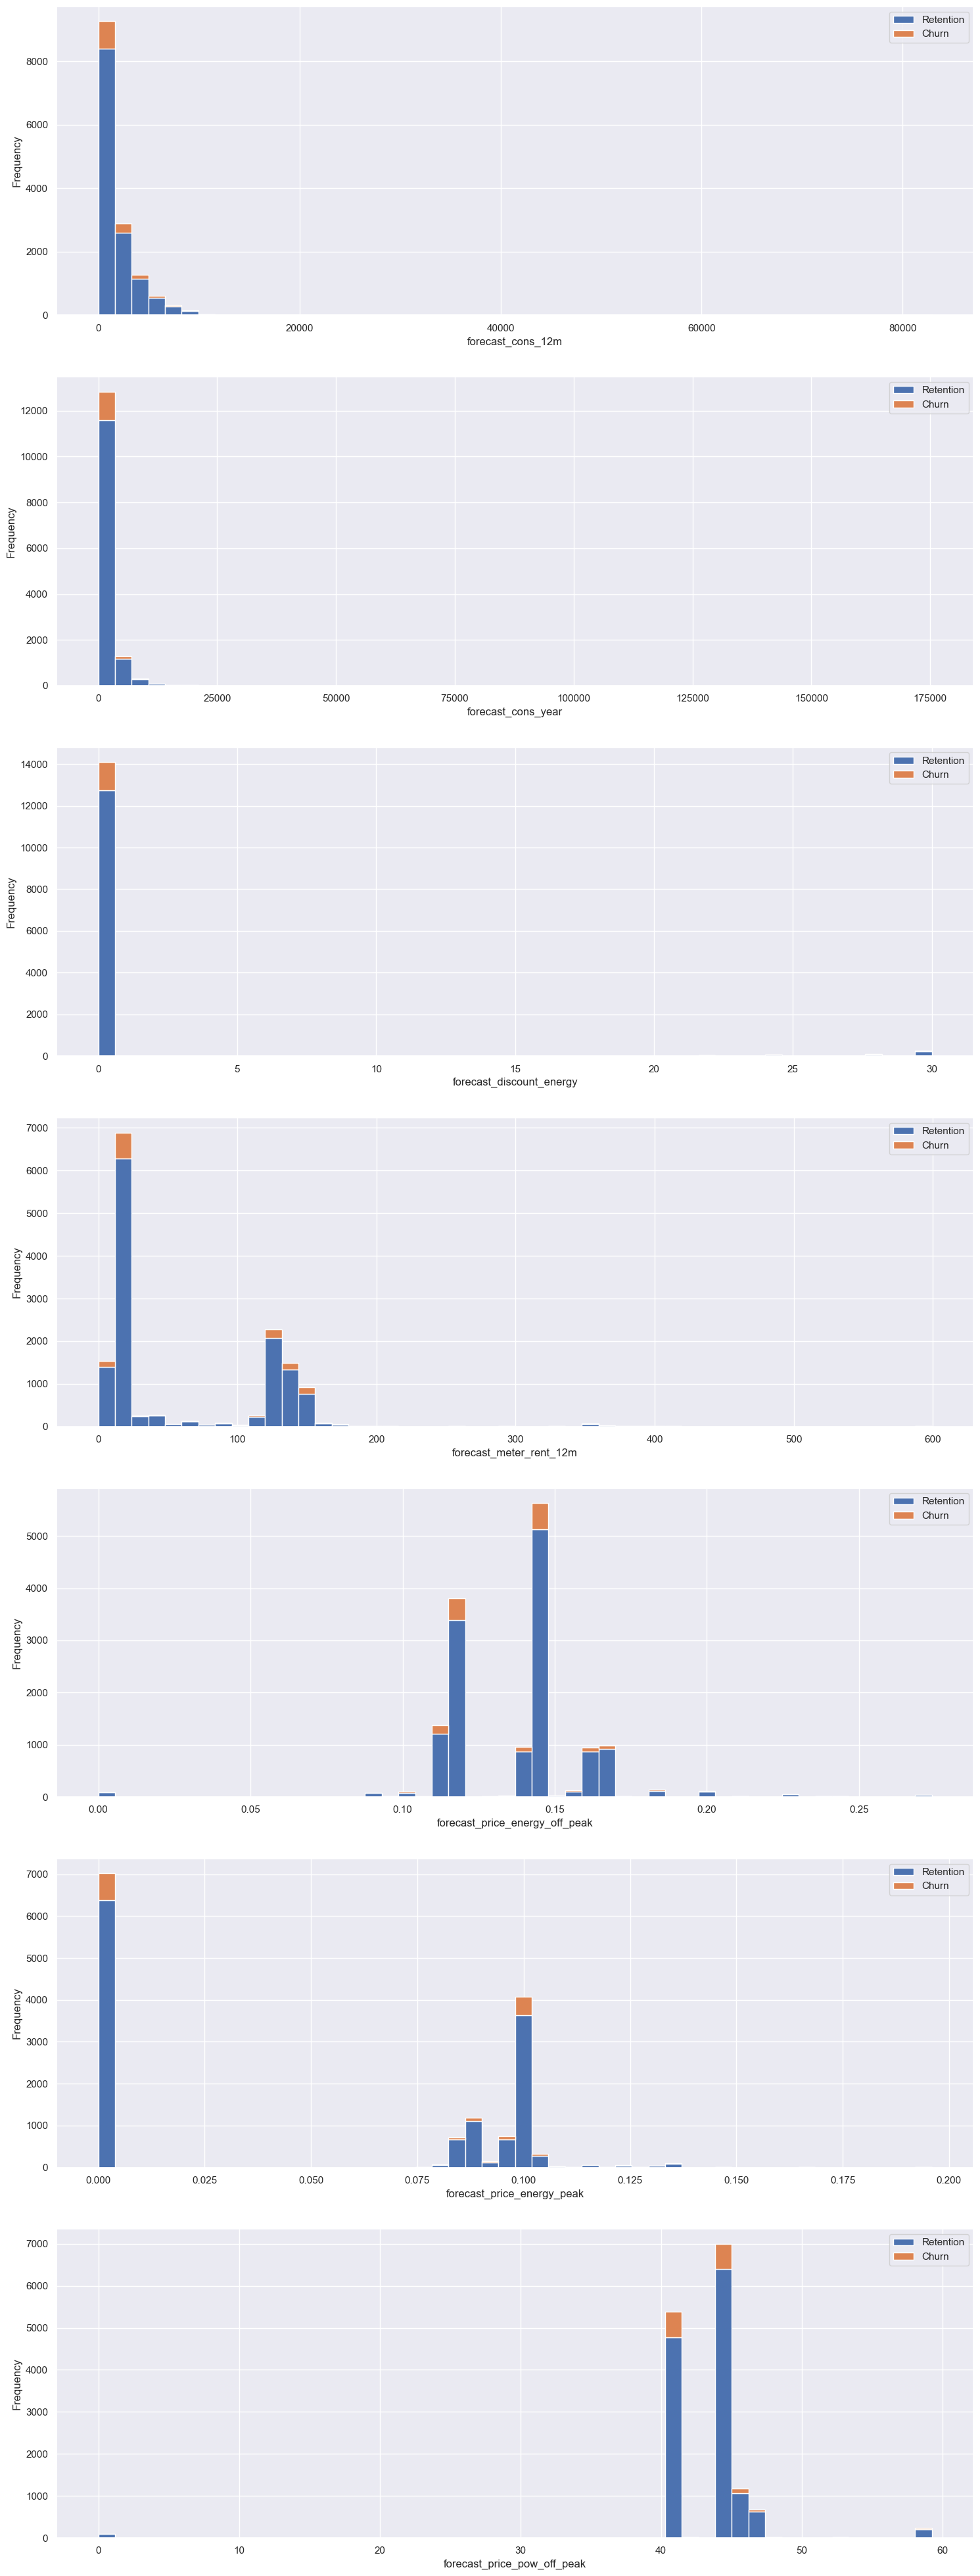

In [22]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

### Contract Type

In [23]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

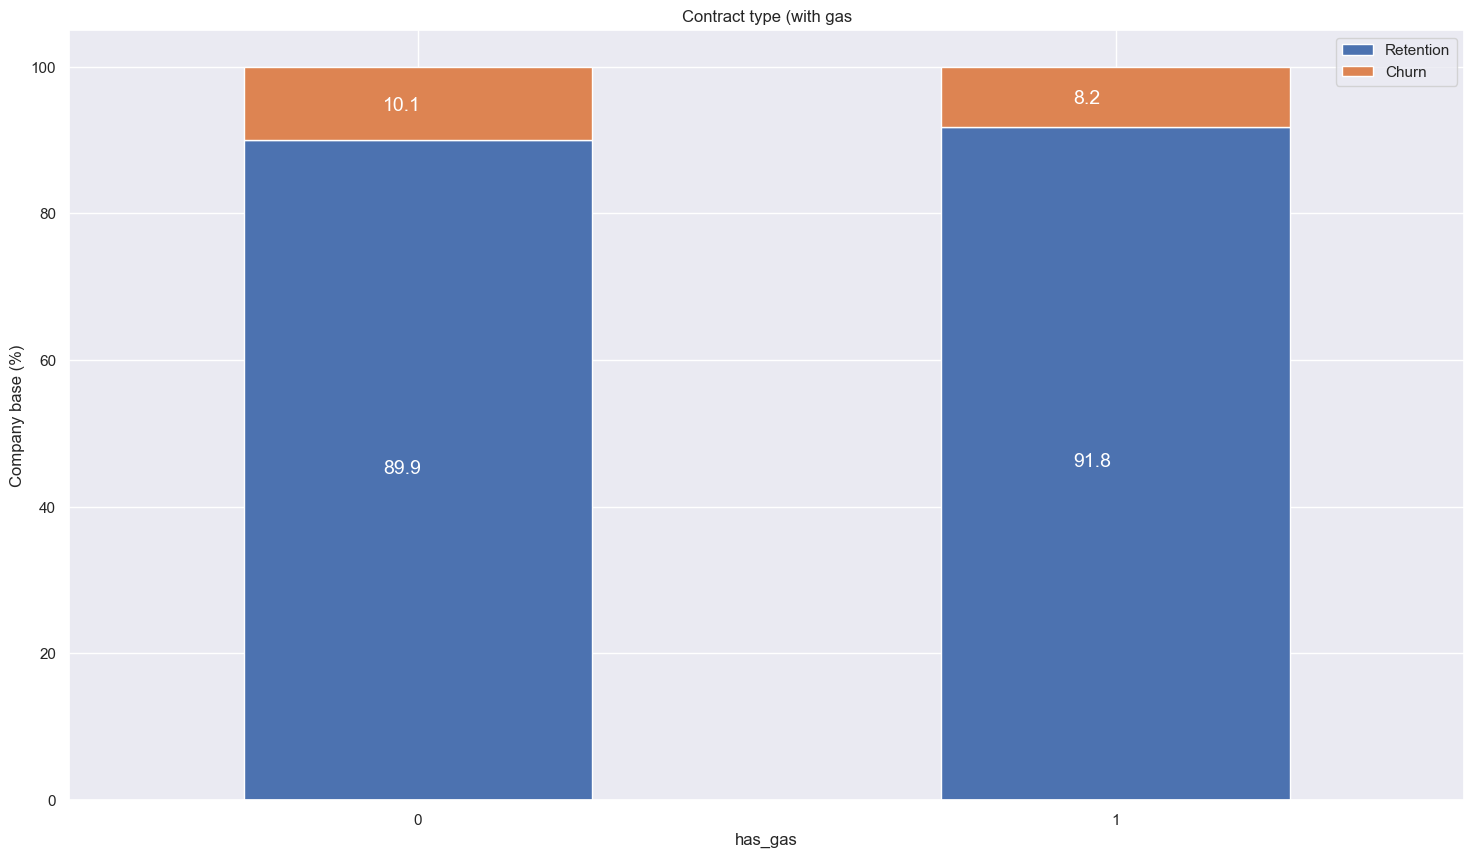

In [24]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

### Subscribed power

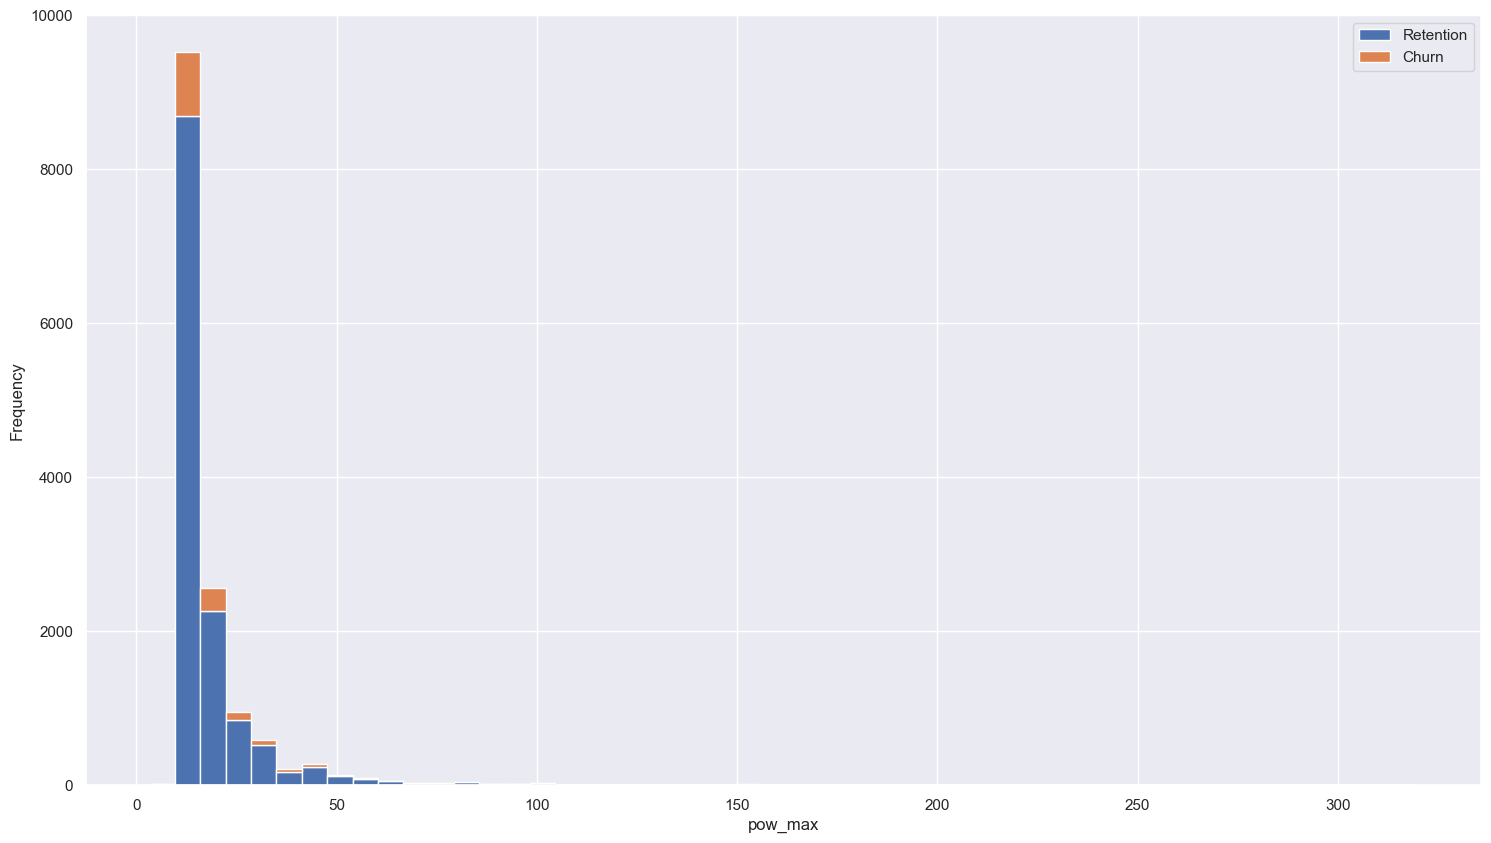

In [25]:
power = client_df[['id', 'pow_max', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Other Products

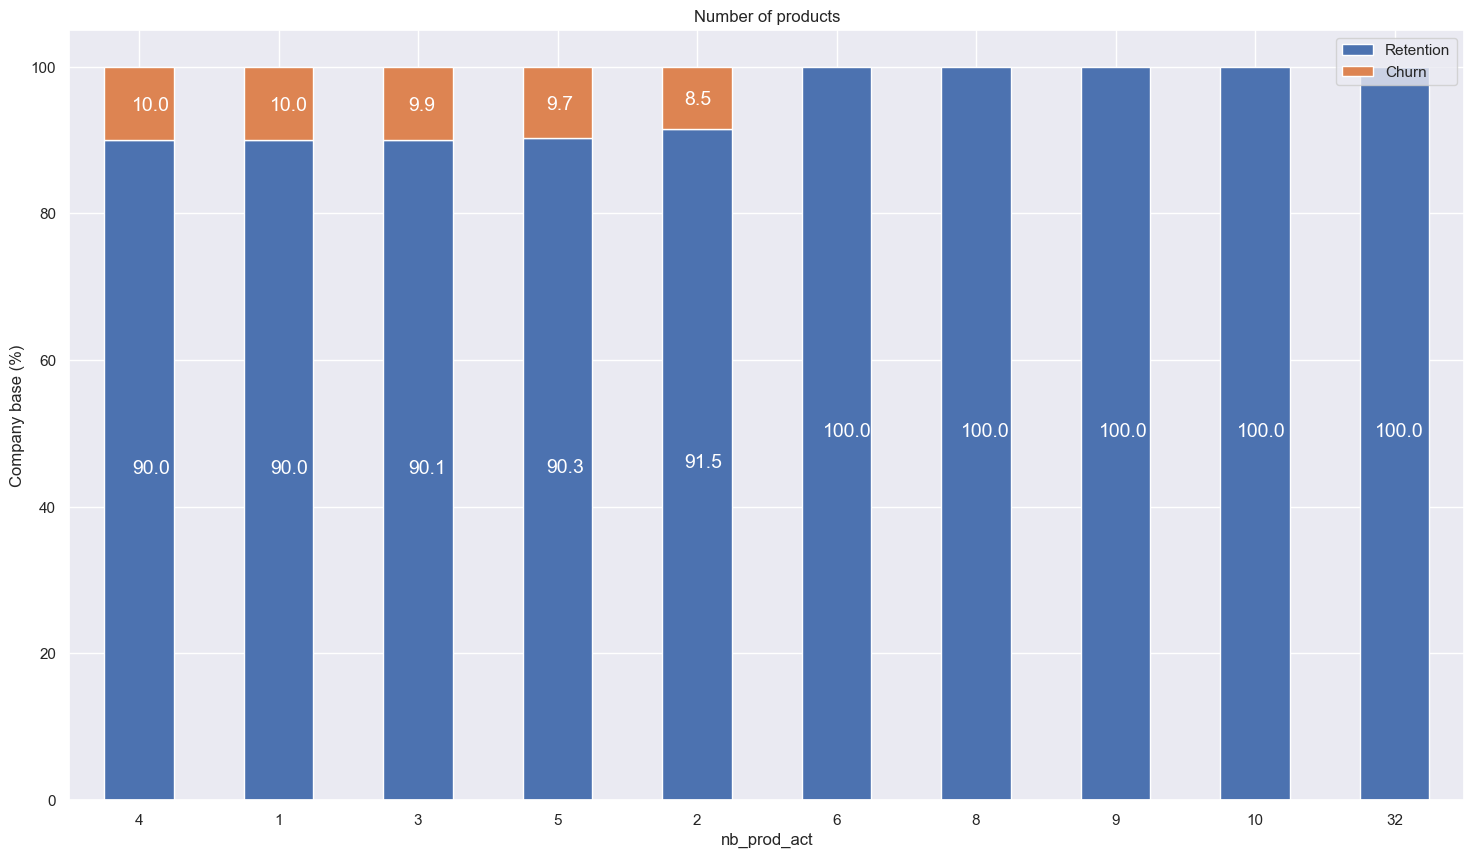

In [26]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

plot_stacked_bars(products_percentage, "Number of products")

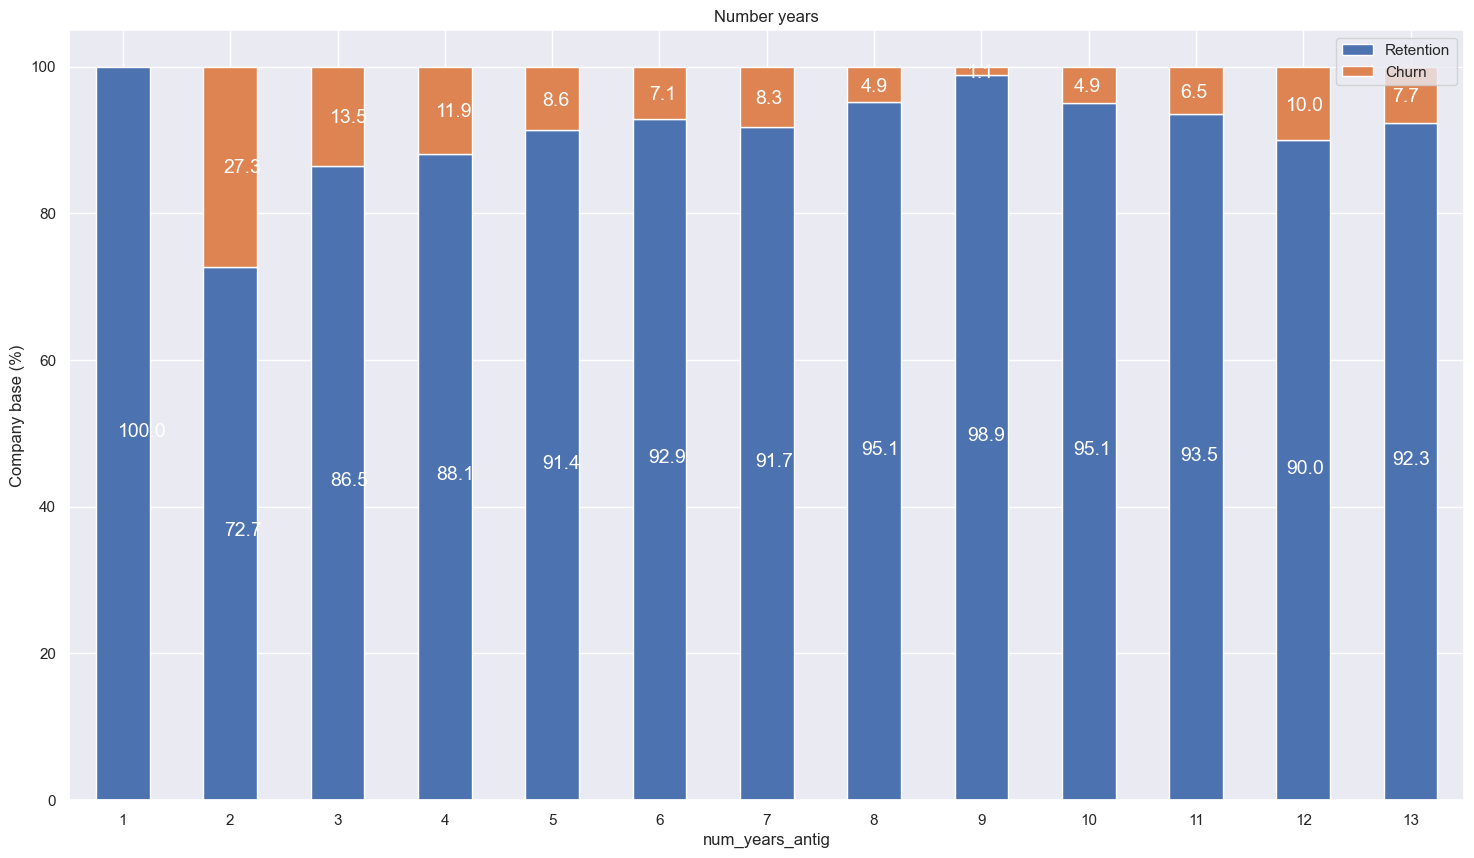

In [27]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)

plot_stacked_bars(years_antig_percentage, "Number years")

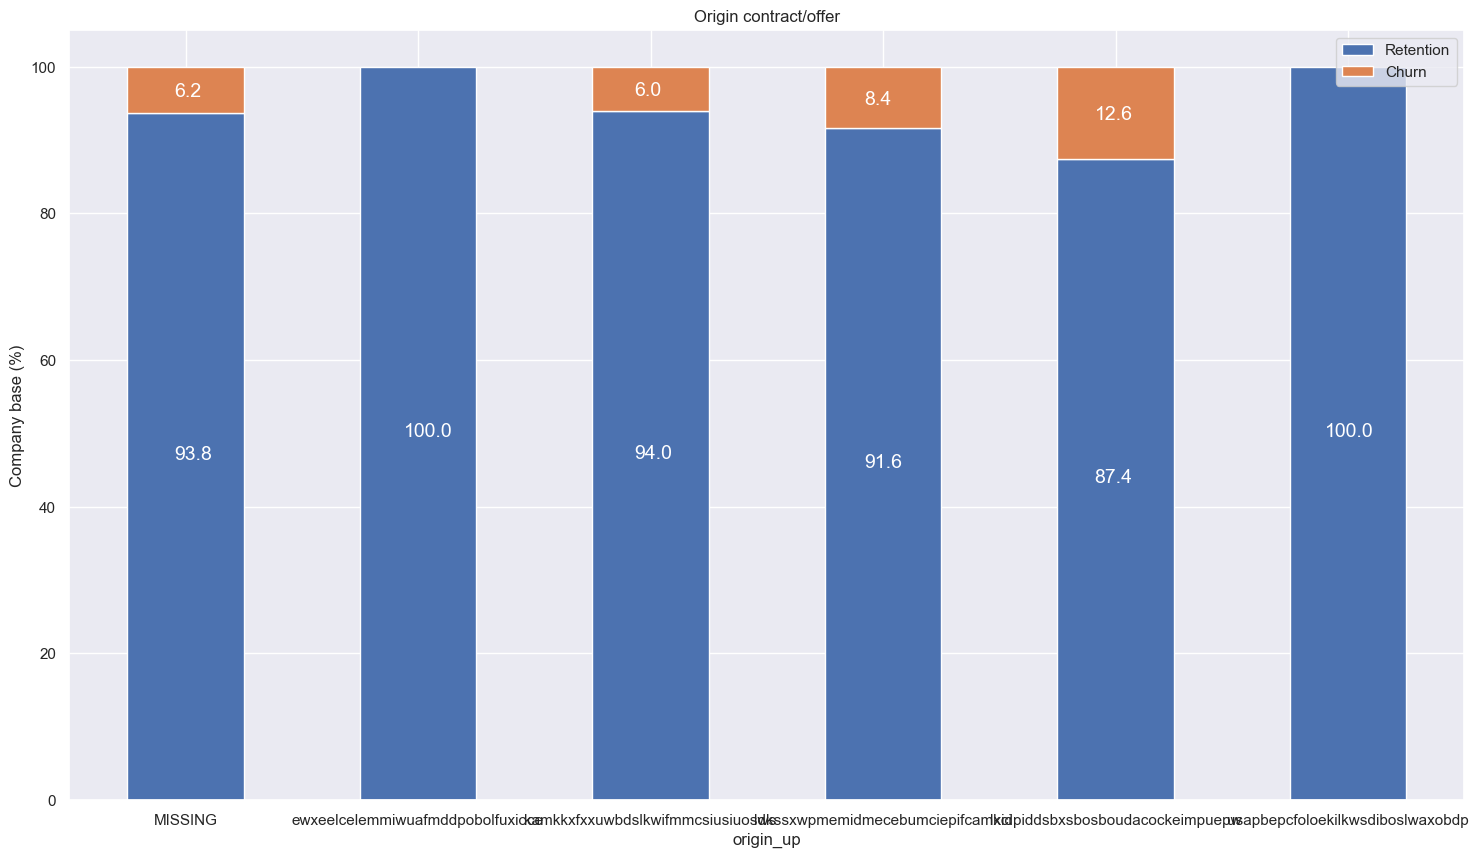

In [28]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)

plot_stacked_bars(origin_percentage, "Origin contract/offer")